# Лабораторная работа 1
## Линейная регрессия - Insurance (Medical Cost Personal Datasets)

## Выполнил: __Щеткин Дмитрий Сергеевич__

группа 2.1

In [1]:
#импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso

In [2]:
#читаем выданные данные
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#размер таблицы
data.shape

(1338, 7)

In [4]:
#типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#проверка пропусков
display(data.isnull().sum())

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


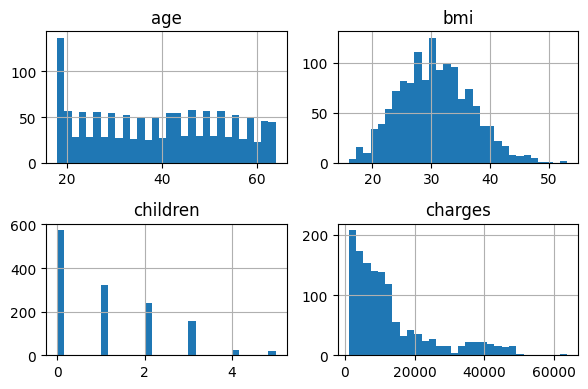

In [6]:
#гистограммы числовых признаков
data[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(6, 4))
plt.tight_layout()
plt.show()

In [7]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


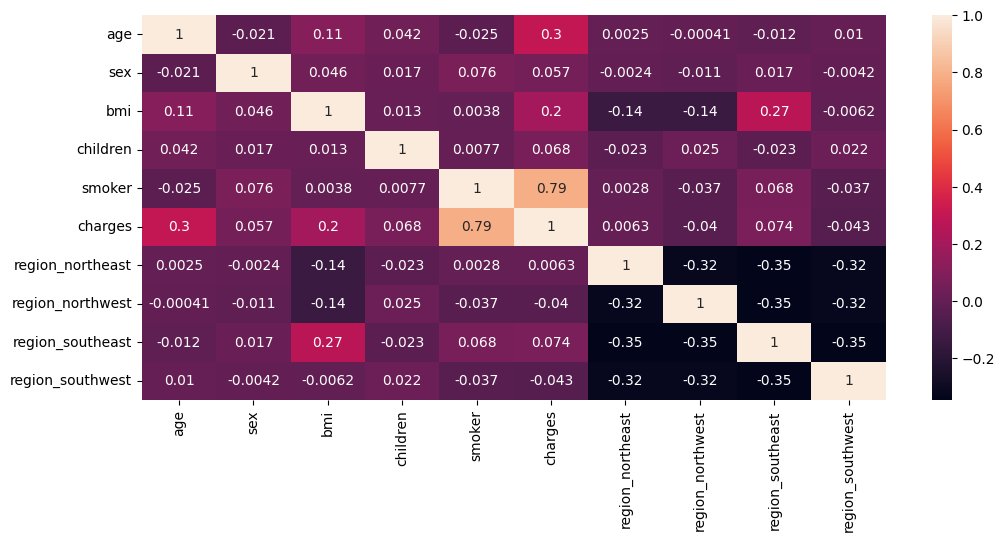

In [8]:
#строим тепловую карту корреляций
fig = plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(), annot=True);

In [9]:
#выделим факторы и целевой признак в отдельные таблицы
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [10]:
#Задание 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


In [11]:
#Задание 2
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

def print_metrics(y, y_predict, label):
    r2 = metrics.r2_score(y, y_predict)
    mae = metrics.mean_absolute_error(y, y_predict)
    mape = metrics.mean_absolute_percentage_error(y, y_predict) * 100
    print(f"{label}\nR2: {r2:.3f}, MAE: {int(mae)}, MAPE: {int(mape)}%")

print_metrics(y_train, y_train_predict, "Train")
print_metrics(y_test, y_test_predict, "Test")

Train
R2: 0.742, MAE: 4208, MAPE: 42%
Test
R2: 0.784, MAE: 4181, MAPE: 46%


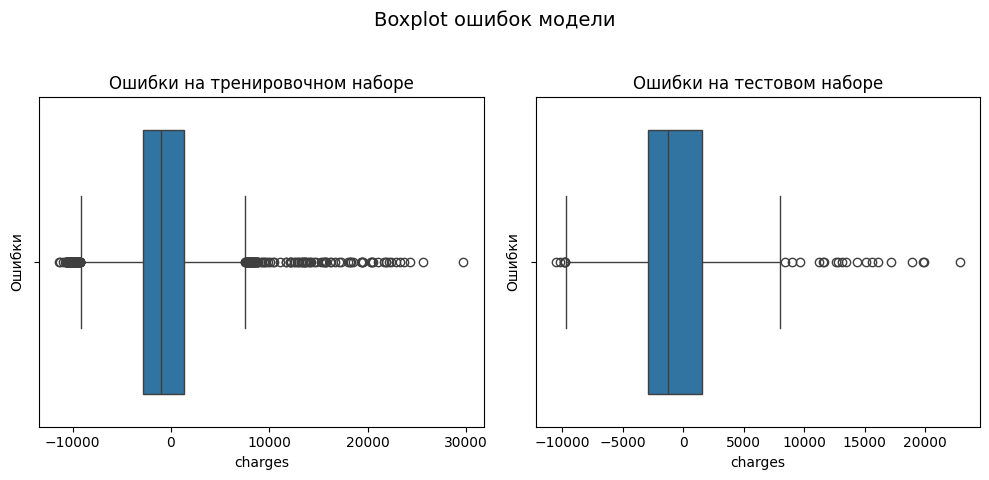

In [13]:
#Задание 3
errors_train = y_train - y_train_predict
errors_test = y_test - y_test_predict

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Boxplot для тренировочных ошибок
sns.boxplot(x=errors_train, ax=axes[0])
axes[0].set_title("Ошибки на тренировочном наборе")
axes[0].set_ylabel("Ошибки")

#Boxplot для тестовых ошибок
sns.boxplot(x=errors_test, ax=axes[1])
axes[1].set_title("Ошибки на тестовом наборе")
axes[1].set_ylabel("Ошибки")

plt.suptitle("Boxplot ошибок модели", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Верные ответы:
- Разброс ошибок на тренировочной выборке больше, чем на тестовой
- Медианная ошибка
на тренировочной и тестовой выборках отрицательная (меньше 0)

In [14]:
#Задание 4
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Количество полиномиальных признаков(степень 2):", X_train_poly.shape[1])

Количество полиномиальных признаков(степень 2): 54


In [15]:
#Задание 5
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_test_poly_predict = poly_model.predict(X_test_poly)

r2_poly = metrics.r2_score(y_test, y_test_poly_predict)

print("Test R2 (полиномиальных признаков):", round(r2_poly, 3))

Test R2 (полиномиальных признаков): 0.867


In [16]:
#Задание 6
coefficients = poly_model.coef_
print("Коэффициенты модели:", coefficients)

Коэффициенты модели: [ 2849.35067435  -417.24034999  5935.92169643  4636.08544526
  1139.1491985    351.86496094  -366.48563336   227.08922666
  -212.46855424  8399.63608632   812.46558472   995.68651894
 -1666.91118191   172.50303109  -848.02252419   280.84325571
  1455.92298005  1960.60696278  -417.24034999   647.47475622
 -1238.19812114   257.33745404  -966.67881613   311.8232212
   544.21466602  -306.59942109 -9711.00034091  1559.87212018
 54839.212545    3782.01457236  2765.86075737  -794.72610916
   182.77247586 -2090.61756751 -2233.48411893  2438.06291171
  2463.6574199    410.25306251  -675.88794885  1139.1491985
   318.56157022  -298.80831333  -589.98196067  1709.37790228
   351.86496094     0.             0.             0.
  -366.48563336     0.             0.           227.08922666
     0.          -212.46855424]


Вывод:
- Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация

In [17]:
#Задание 7
lasso_model = Lasso(alpha=1.0, max_iter=2000)
lasso_model.fit(X_train_poly, y_train)
y_lasso_pred = lasso_model.predict(X_test_poly)

print_metrics(y_test, y_lasso_pred, "Lasso Test")

Lasso Test
R2: 0.867, MAE: 2719, MAPE: 30%
